# *Priyanshu Raj*

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST training and test datasets
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [ ]:
print(f"Number of training samples: {len(train_set)}")
print(f"Number of testing samples: {len(test_set)}")


Number of training samples: 60000
Number of testing samples: 10000


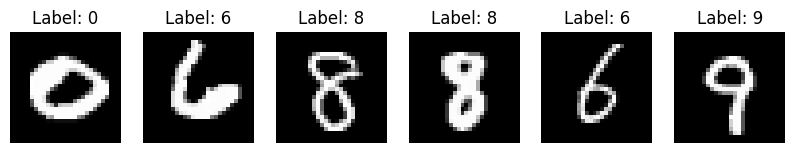

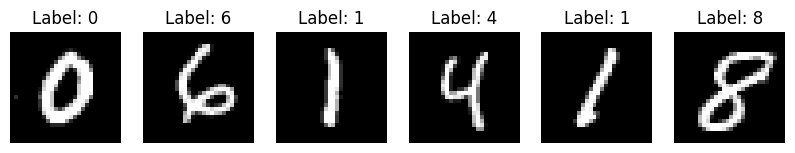

In [ ]:
import matplotlib.pyplot as plt

def show_samples(dataset, n=6):
    loader = torch.utils.data.DataLoader(dataset, batch_size=n, shuffle=True)
    images, labels = next(iter(loader))
    images = images.numpy().squeeze()

    fig, axes = plt.subplots(1, n, figsize=(10, 4))
    for i in range(n):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

# Show samples from training and testing sets
show_samples(train_set)
show_samples(test_set)


In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.fc = nn.Linear(28*28, 10)  # Flatten the 28x28 images to 784 input features

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.fc(x)
        return F.log_softmax(x, dim=1)


In [ ]:
import torch.optim as optim

# Initialize model, loss function, and optimizer
model = LogisticRegressionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training function
def train(model, train_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()

            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

# Train the model
train(model, train_loader, criterion, optimizer)


Epoch 1, Loss: 0.4696, Accuracy: 87.34%
Epoch 2, Loss: 0.3324, Accuracy: 90.56%
Epoch 3, Loss: 0.3113, Accuracy: 91.20%
Epoch 4, Loss: 0.3004, Accuracy: 91.55%
Epoch 5, Loss: 0.2931, Accuracy: 91.76%


In [ ]:
class LogisticRegressionWithBatchNorm(nn.Module):
    def __init__(self):
        super(LogisticRegressionWithBatchNorm, self).__init__()
        self.fc = nn.Linear(28*28, 10)
        self.bn = nn.BatchNorm1d(10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc(x)
        x = self.bn(x)
        return F.log_softmax(x, dim=1)


In [ ]:
model_bn = LogisticRegressionWithBatchNorm()

print("Training with Batch Normalization Only:")
train(model_bn, train_loader, criterion, optimizer)


Training with Batch Normalization Only:
Epoch 1, Loss: 2.8761, Accuracy: 9.34%
Epoch 2, Loss: 2.8747, Accuracy: 9.35%
Epoch 3, Loss: 2.8746, Accuracy: 9.40%
Epoch 4, Loss: 2.8736, Accuracy: 9.43%
Epoch 5, Loss: 2.8737, Accuracy: 9.41%


In [ ]:
transform = transforms.Compose([
    transforms.RandomRotation(10),   # Random rotation
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Recreate train_set with augmentation
train_set_augmented = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader_augmented = DataLoader(train_set_augmented, batch_size=64, shuffle=True)


In [ ]:
print("Training with Data Augmentation Only:")
train(model, train_loader_augmented, criterion, optimizer)


Training with Data Augmentation Only:
Epoch 1, Loss: 0.5349, Accuracy: 83.25%
Epoch 2, Loss: 0.5329, Accuracy: 83.35%
Epoch 3, Loss: 0.5302, Accuracy: 83.51%
Epoch 4, Loss: 0.5252, Accuracy: 83.60%
Epoch 5, Loss: 0.5246, Accuracy: 83.52%


In [ ]:
class LogisticRegressionWithDropout(nn.Module):
    def __init__(self):
        super(LogisticRegressionWithDropout, self).__init__()
        self.fc = nn.Linear(28*28, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.dropout(self.fc(x))
        return F.log_softmax(x, dim=1)


In [ ]:
model_dropout = LogisticRegressionWithDropout()

print("Training with Dropout Only:")
train(model_dropout, train_loader, criterion, optimizer)


Training with Dropout Only:
Epoch 1, Loss: 2.4229, Accuracy: 11.42%
Epoch 2, Loss: 2.4252, Accuracy: 11.33%
Epoch 3, Loss: 2.4191, Accuracy: 11.44%
Epoch 4, Loss: 2.4211, Accuracy: 11.62%
Epoch 5, Loss: 2.4215, Accuracy: 11.77%


In [ ]:
class LogisticRegressionWithBatchNormAndAugmentation(nn.Module):
    def __init__(self):
        super(LogisticRegressionWithBatchNormAndAugmentation, self).__init__()
        self.fc = nn.Linear(28*28, 10)
        self.bn = nn.BatchNorm1d(10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc(x)
        x = self.bn(x)
        return F.log_softmax(x, dim=1)

# Data Augmentation
transform_aug = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the augmented dataset into DataLoader
train_set_aug = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_aug)
train_loader_aug = DataLoader(train_set_aug, batch_size=64, shuffle=True)

# Train the model with Batch Norm and Augmentation
model_bn_aug = LogisticRegressionWithBatchNormAndAugmentation()
train(model_bn_aug, train_loader_aug, criterion, optimizer)


Epoch 1, Loss: 2.5437, Accuracy: 11.34%
Epoch 2, Loss: 2.5434, Accuracy: 11.23%
Epoch 3, Loss: 2.5448, Accuracy: 11.33%
Epoch 4, Loss: 2.5398, Accuracy: 11.49%
Epoch 5, Loss: 2.5392, Accuracy: 11.38%


In [ ]:
class LogisticRegressionWithBatchNormAndDropout(nn.Module):
    def __init__(self):
        super(LogisticRegressionWithBatchNormAndDropout, self).__init__()
        self.fc = nn.Linear(28*28, 10)
        self.bn = nn.BatchNorm1d(10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc(x)
        x = self.bn(x)
        x = self.dropout(x)
        return F.log_softmax(x, dim=1)

# Train the model with Batch Norm and Dropout
model_bn_dropout = LogisticRegressionWithBatchNormAndDropout()
train(model_bn_dropout, train_loader, criterion, optimizer)


Epoch 1, Loss: 3.1411, Accuracy: 10.50%
Epoch 2, Loss: 3.1391, Accuracy: 10.74%
Epoch 3, Loss: 3.1386, Accuracy: 10.77%
Epoch 4, Loss: 3.1424, Accuracy: 10.89%
Epoch 5, Loss: 3.1339, Accuracy: 10.92%


In [ ]:
class LogisticRegressionWithAugmentationAndDropout(nn.Module):
    def __init__(self):
        super(LogisticRegressionWithAugmentationAndDropout, self).__init__()
        self.fc = nn.Linear(28*28, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc(x)
        x = self.dropout(x)
        return F.log_softmax(x, dim=1)

# Train the model with Data Augmentation and Dropout
model_aug_dropout = LogisticRegressionWithAugmentationAndDropout()
train(model_aug_dropout, train_loader_aug, criterion, optimizer)


Epoch 1, Loss: 2.4652, Accuracy: 9.76%
Epoch 2, Loss: 2.4649, Accuracy: 9.80%
Epoch 3, Loss: 2.4613, Accuracy: 9.72%
Epoch 4, Loss: 2.4596, Accuracy: 9.99%
Epoch 5, Loss: 2.4651, Accuracy: 9.77%
